### Extract the orders with wavelength information from the rectified image

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii, fits
from matplotlib.gridspec import GridSpec
from scipy import interpolate
from astropy.visualization import MinMaxInterval, AsinhStretch, HistEqStretch, ImageNormalize
%matplotlib inline

In [2]:
# load in a rectified image
path = '../191008/proc/'
source = 'rectified1-2'

hdu1 = fits.open(path+source+'.fits')
flux = hdu1[0].data
var = hdu1[1].data
rect_hd = hdu1[0].header
hdu1.close()

Text(0.5, 1.0, 'Variance')

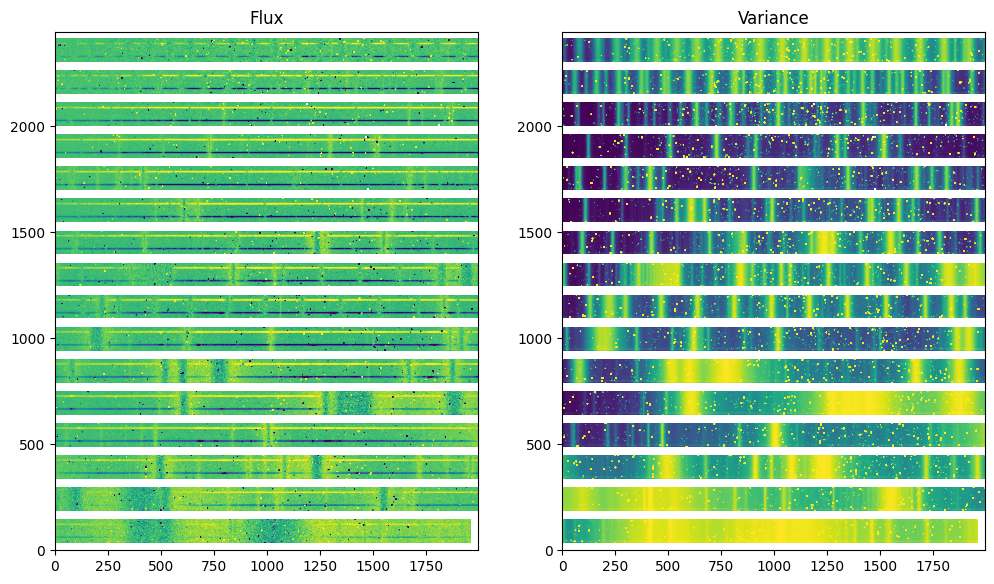

In [3]:
fig = plt.figure(figsize=(12, 7))
ax1 = plt.subplot(121)
#flux_norm = ImageNormalize(flux, interval=MinMaxInterval(), stretch=HistEqStretch(flux))
flux_norm = ImageNormalize(flux, vmin=-5, vmax=5, stretch=AsinhStretch(0.3))
ax1.imshow(flux, origin='lower', norm=flux_norm)
ax1.set_title('Flux')
ax2 = plt.subplot(122)
var_norm = ImageNormalize(var, interval=MinMaxInterval(), stretch=HistEqStretch(var))
ax2.imshow(var, origin='lower', norm=var_norm)
ax2.set_title('Variance')

In [4]:
print(np.nanmin(flux/np.sqrt(var)), np.nanmax(flux/np.sqrt(var)))

-4719.231602475653 3521.360225979295


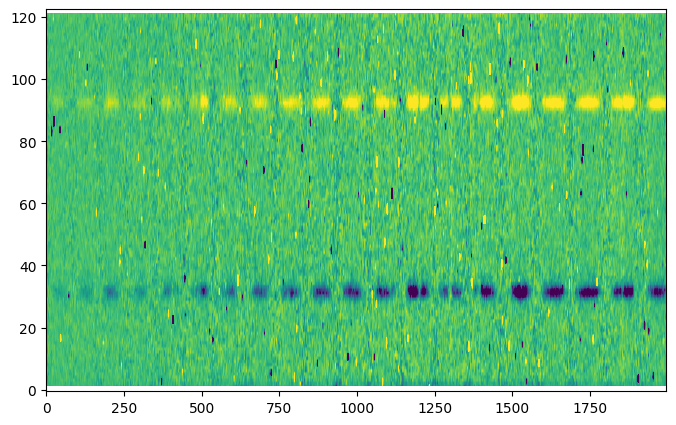

In [5]:
# plot a given order (between 99 and 114)
# this is, for now, figured out by hand and is critical that it be done right for matching to the slit offset later
# it would be good to code in some checks on image size compared to the wavelcal file order extensions
# and perhaps edge detection to do this automatically in the future
fig, ax = plt.subplots(figsize=(8, 8))
j1 = 30           # starting point of first order -- figured out by hand
dj_AB = 121       # width of each order -- this should match the size of the number of rows in the order extension
dj_blank = 30     # gap between orders -- this is figured out by eye and assumed to be the same for all orders
dj_plot = 1       # cosmetic gap to make the plot look nice

order = 114
j0 = j1 + (dj_AB + dj_blank) * (order - 99)
ax.imshow(flux[j0-dj_plot:j0+dj_AB+dj_plot, :], origin='lower', norm=flux_norm, aspect=10)

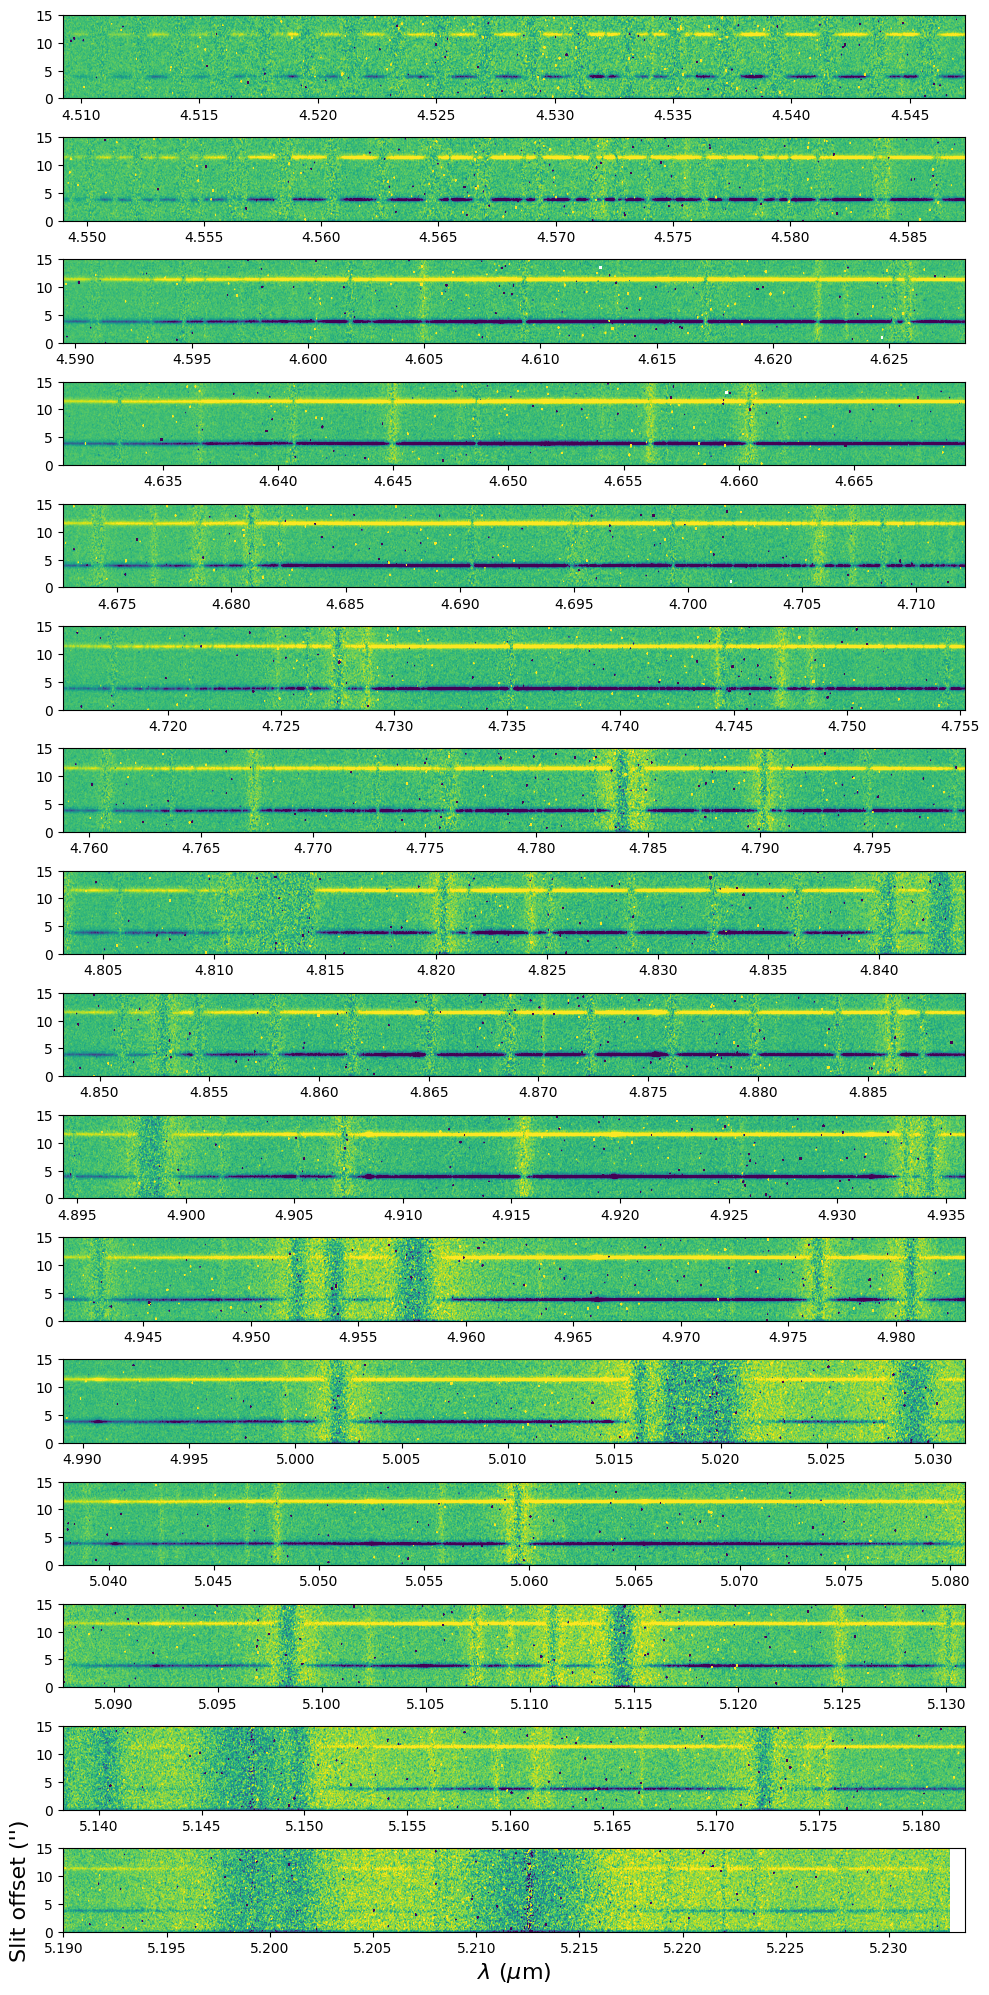

In [6]:
# load in the wavecal data and try to make sense of it
path = '../191008/cal/'
calfile = 'wavecal1-28'

hdu2 = fits.open(path+calfile+'.fits')
wc_hd = hdu2[0].header
orders = wc_hd['ORDERS'].split(',')
norders = wc_hd['NORDERS']

fig = plt.figure(figsize=(10, 20))

for n in range(norders):
    wavecal1 = hdu2[3+n].data
    wl = wavecal1[0, 0, 1:]
    slitpos = wavecal1[0, 1:, 0]

    extent = [wl.min(), wl.max(), slitpos.min(), slitpos.max()]
    #print(f'Order = {n:2d}, Min/Max wavelength = {wl.min()}, {wl.max()}')
    ax = fig.add_subplot(norders, 1, norders-n)
    j0 = j1 + (dj_AB + dj_blank) * n
    order1_flux = flux[j0:j0+dj_AB, :]
    order1_var = var[j0:j0+dj_AB, :]
    ax.imshow(order1_flux, origin='lower', norm=flux_norm, extent=extent, aspect='auto')

    if n == 0:
        ax.set_xlabel(r"$\lambda$ ($\mu$m)", fontsize=16)
        ax.set_ylabel(r"Slit offset ('')", fontsize=16)

plt.tight_layout()
plt.savefig('labeled_orders.png')